In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')


In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train['count'].head()

,count
0,16
1,40
2,32
3,13
4,1


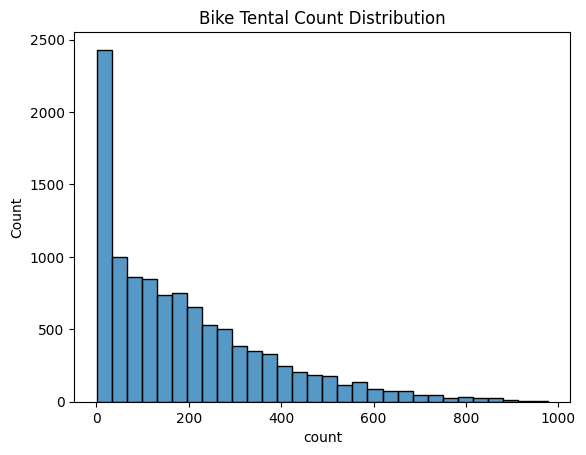

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(train['count'],bins = 30)
plt.title("Bike Tental Count Distribution")
plt.show()

In [10]:
train['datetime']=pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour

In [12]:
train[['datetime', 'year','month','day','hour']].head()

,datetime,year,month,day,hour
0,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,2011,1,1,4


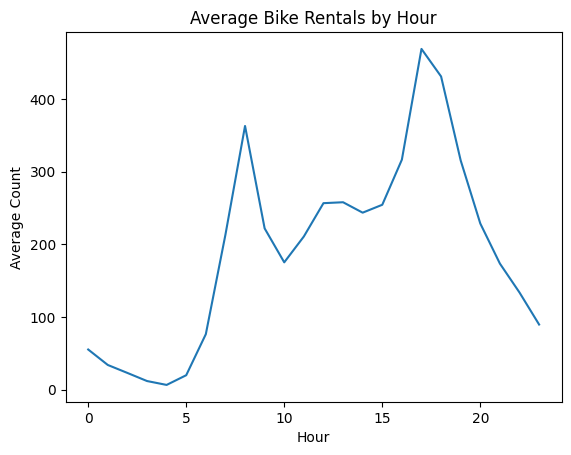

In [13]:
hourly_mean = train.groupby('hour')['count'].mean()

plt.figure()
hourly_mean.plot()
plt.title("Average Bike Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.show()


In [14]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [15]:
train['weekday'] = train['datetime'].dt.weekday


In [16]:
train[['datetime', 'weekday']].head()

,datetime,weekday
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [17]:
train['is_weekend'] = train['weekday'].isin([5,6]).astype(int)

In [19]:
train[['datetime','weekday','is_weekend']].head()

,datetime,weekday,is_weekend
0,2011-01-01 00:00:00,5,1
1,2011-01-01 01:00:00,5,1
2,2011-01-01 02:00:00,5,1
3,2011-01-01 03:00:00,5,1
4,2011-01-01 04:00:00,5,1


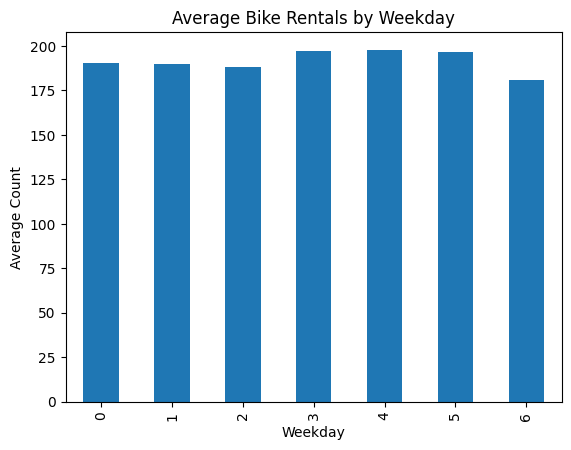

In [20]:
weekday_mean = train.groupby('weekday')['count'].mean()

plt.figure()
weekday_mean.plot(kind='bar')
plt.title("Average Bike Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Count")
plt.show()

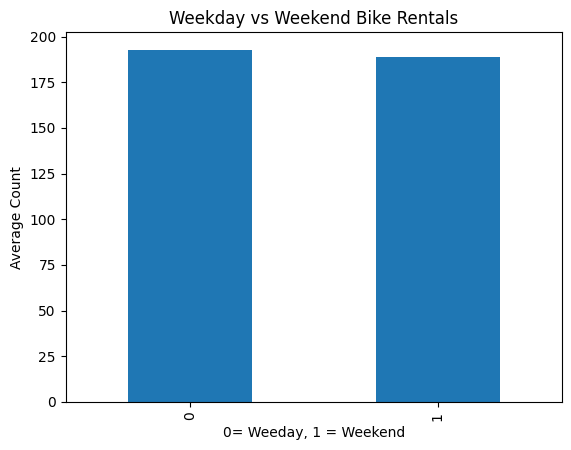

In [21]:
weekend_mean = train.groupby('is_weekend')['count'].mean()

plt.figure()
weekend_mean.plot(kind='bar')
plt.title("Weekday vs Weekend Bike Rentals")
plt.xlabel("0= Weeday, 1 = Weekend")
plt.ylabel("Average Count")
plt.show()

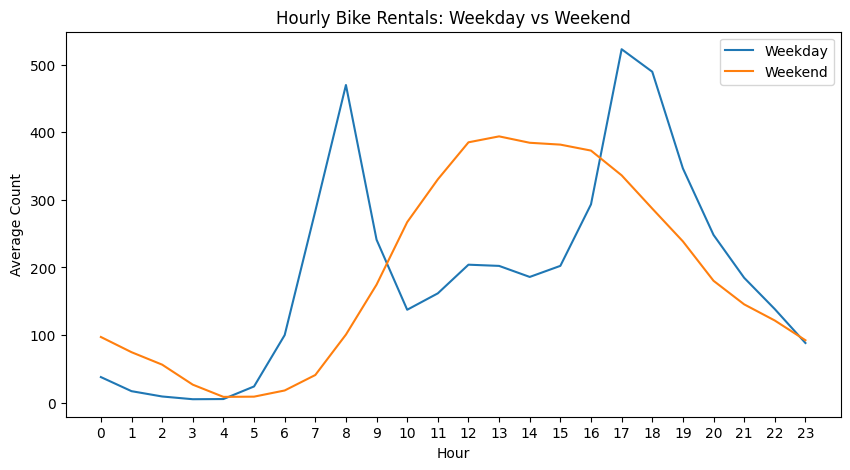

In [26]:
hour_weekend_mean.plot(figsize=(10,5))

plt.title("Hourly Bike Rentals: Weekday vs Weekend")
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.xticks(range(0, 24))
plt.legend(['Weekday', 'Weekend'])
plt.show()


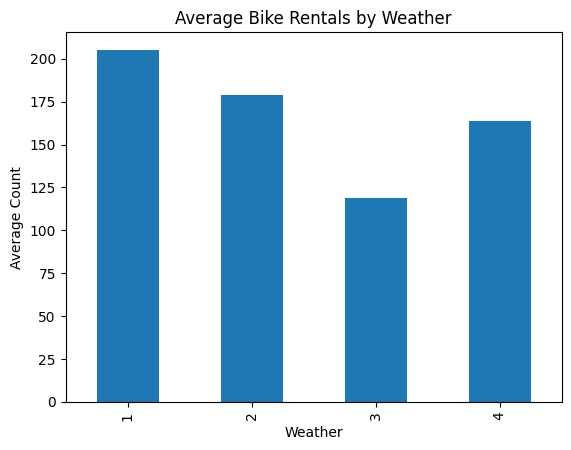

In [30]:
weather_mean = train.groupby('weather')['count'].mean()

plt.figure()
weather_mean.plot(kind ='bar')
plt.title("Average Bike Rentals by Weather")
plt.xlabel("Weather")
plt.ylabel("Average Count")
plt.show()

In [28]:
train['weather'].value_counts().sort_index()
#1.맑음 2.안개/흐림 3.약한비/눈 4.강한비/폭설

,count
weather,
1,7192
2,2834
3,859
4,1


In [32]:
train['weather_group'] = train['weather'].isin([3, 4]).astype(int)
test['weather_group']  = test['weather'].isin([3, 4]).astype(int)


In [33]:
train[['weather','weather_group']].head(10)

,weather,weather_group
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,2,0
6,1,0
7,1,0
8,1,0
9,1,0


In [34]:
pd.crosstab(train['weather'], train['weather_group'])

weather_group,0,1
weather,,
1,7192,0
2,2834,0
3,0,859
4,0,1


In [40]:
features = [
    'year','month','hour','weekday','is_weekend','workingday','season','weather_group',
    'temp','atemp','humidity','windspeed'
]

X = train[features]
y = train['count']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,y,
    test_size=0.2, random_state=42
)

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred = lr.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(141.0526979339867)

In [47]:
#randomforest


from random import Random

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 300, random_state = 42, n_jobs = 1
)

rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=1, random_state=42)

In [49]:
y_pred_rf = rf.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rmse_rf


np.float64(39.04296120551761)

In [50]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_, index=features
)

importance.sort_values(ascending=False)

importance

,0
year,0.085757
month,0.047074
hour,0.598225
weekday,0.030123
is_weekend,0.012761
workingday,0.056806
season,0.010390
weather_group,0.012671
temp,0.058201
atemp,0.049240


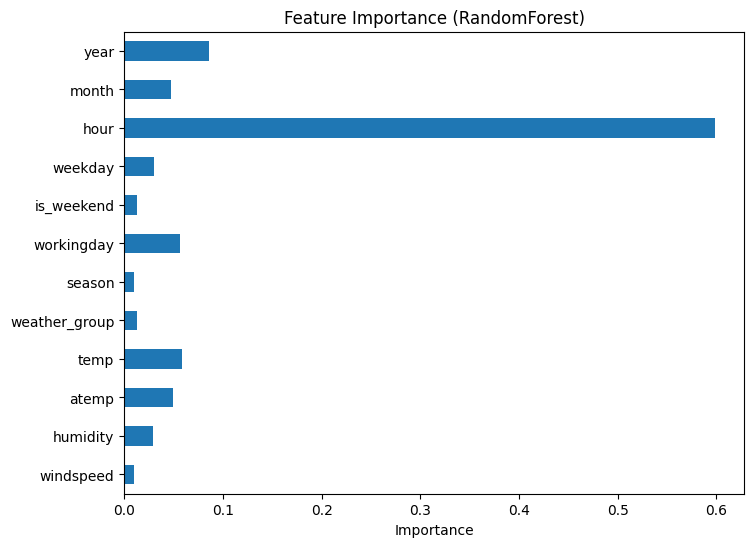

In [51]:
importance.plot(kind='barh', figsize=(8, 6))

plt.title("Feature Importance (RandomForest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [53]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday
test['is_weekend'] = test['weekday'].isin([5,6]).astype(int)

test['weather_group'] = test['weather'].isin([3,4]).astype(int)

In [61]:
test = pd.read_csv('test.csv')


In [62]:
len(test)

6493

In [63]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday
test['is_weekend'] = test['weekday'].isin([5, 6]).astype(int)

test['weather_group'] = test['weather'].isin([3, 4]).astype(int)


In [64]:
X_test = test[features]
len(X_test)


6493

In [65]:
test_pred = rf.predict(X_test)
len(test_pred)

submission = pd.DataFrame({
    'datetime': test['datetime'],
    'count': test_pred
})

len(submission)


6493

In [66]:
submission.to_csv('submission.csv', index=False)
